In [ ]:
!pip install keras pandas numpy jupyter notebook tqdm opencv-contrib-python scikit-learn

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install keras-preprocessing

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img


In [5]:
TRAIN_DIR = 'emotionpic/images/train'
TEST_DIR = 'emotionpic/images/validation'


In [7]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [8]:
import pandas as pd
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(train)


                                           image     label
0            emotionpic/images/train\angry\0.jpg     angry
1            emotionpic/images/train\angry\1.jpg     angry
2           emotionpic/images/train\angry\10.jpg     angry
3        emotionpic/images/train\angry\10002.jpg     angry
4        emotionpic/images/train\angry\10016.jpg     angry
...                                          ...       ...
28816  emotionpic/images/train\surprise\9969.jpg  surprise
28817  emotionpic/images/train\surprise\9985.jpg  surprise
28818  emotionpic/images/train\surprise\9990.jpg  surprise
28819  emotionpic/images/train\surprise\9992.jpg  surprise
28820  emotionpic/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(test)
print(test['image'])

                                               image     label
0       emotionpic/images/validation\angry\10052.jpg     angry
1       emotionpic/images/validation\angry\10065.jpg     angry
2       emotionpic/images/validation\angry\10079.jpg     angry
3       emotionpic/images/validation\angry\10095.jpg     angry
4       emotionpic/images/validation\angry\10121.jpg     angry
...                                              ...       ...
7061  emotionpic/images/validation\surprise\9806.jpg  surprise
7062  emotionpic/images/validation\surprise\9830.jpg  surprise
7063  emotionpic/images/validation\surprise\9853.jpg  surprise
7064  emotionpic/images/validation\surprise\9878.jpg  surprise
7065   emotionpic/images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         emotionpic/images/validation\angry\10052.jpg
1         emotionpic/images/validation\angry\10065.jpg
2         emotionpic/images/validation\angry\10079.jpg
3         emotionpic/images/validation\angry\10095.jpg

In [21]:
from tqdm.notebook import tqdm

In [25]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [26]:
from keras_preprocessing.image import load_img
from tqdm import tqdm
import numpy as np


In [27]:
train_features = extract_features(train['image'])

100%|██████████| 28821/28821 [06:18<00:00, 76.12it/s]


In [28]:
test_features = extract_features(test['image'])

100%|██████████| 7066/7066 [01:32<00:00, 76.51it/s]


In [29]:
x_train = train_features/255.0
x_test = test_features/255.0

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])

Exception ignored in: <function tqdm.__del__ at 0x000001B4A7A4A5F0>
Traceback (most recent call last):
  File "c:\Users\Asad\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\Asad\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000001B4A7A4A5F0>
Traceback (most recent call last):
  File "c:\Users\Asad\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "c:\Users\Asad\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


LabelEncoder()

In [35]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [36]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [37]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

In [38]:
from tensorflow.keras.models import load_model


In [39]:
model = load_model('facialemotionmodel.h5')


In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

c:\Users\Asad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
from keras.models import model_from_json

In [46]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [47]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [48]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [49]:
image = 'emotionpic/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


c:\Users\Asad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 1s 555ms/step
model prediction is  sad


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 93ms/step
model prediction is  neutral


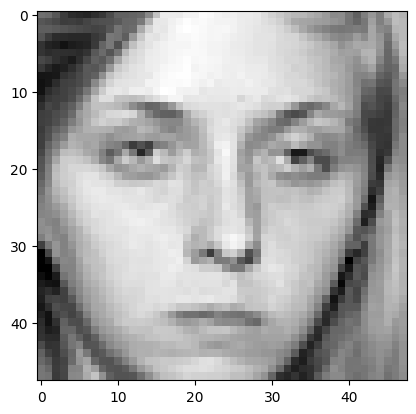

In [53]:
image = 'emotionpic/images/train/sad/58.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 103ms/step
model prediction is  surprise


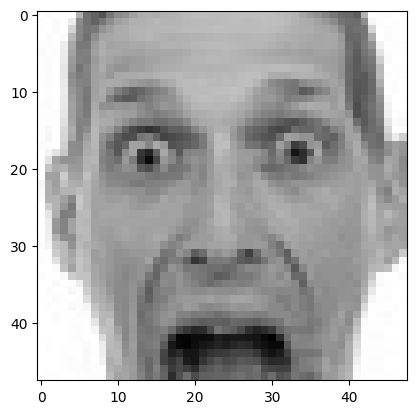

In [54]:
image = 'emotionpic/images/train/fear/9.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 240ms/step
model prediction is  disgust


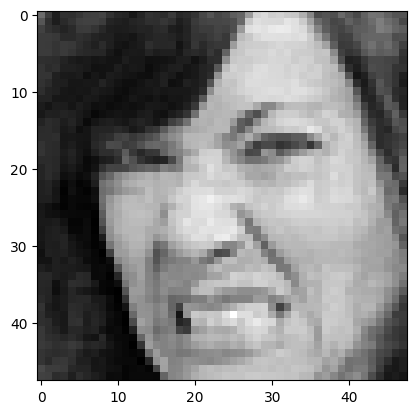

In [55]:
image = 'emotionpic/images/train/disgust/388.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 71ms/step
model prediction is  happy


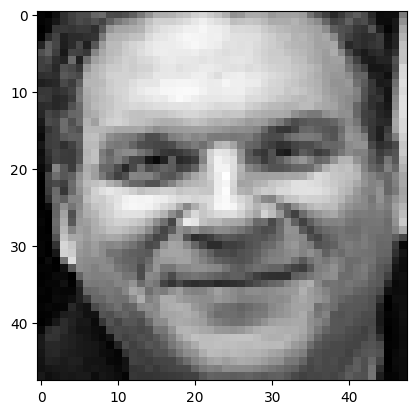

In [56]:
image = 'emotionpic/images/train/happy/14.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
model prediction is  surprise


/usr/local/lib/python3.11/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


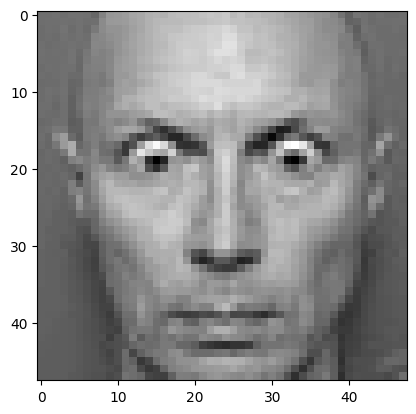

In [ ]:
image = 'emotionpic/images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Angry
1/1 [==============================] - 0s 49ms/step
model prediction is  angry


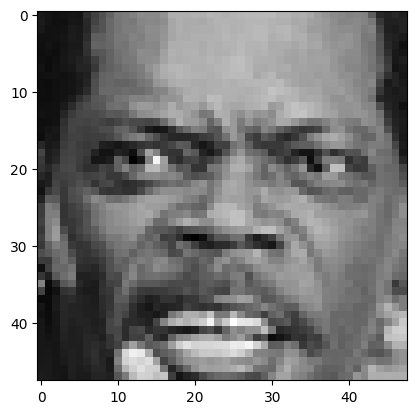

In [58]:
image = 'emotionpic/images/train/Angry/10.jpg'
print("original image is of Angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [62]:
!pip install -q keras opencv-python


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load model
model = load_model("emotiondetector.h5")

# Load and preprocess image
# Replace 'path/to/your/image.jpg' with the actual path to your image
image_path = 'emotionpic/images/train/happy/7.jpg' # Placeholder image path
img = cv2.imread(image_path)
img = cv2.resize(img, (48, 48))       # resize for model (using 48x48 as per training)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
img = img / 255.0                       # normalize
img = np.expand_dims(img, axis=0)      # batch dimension
img = np.expand_dims(img, axis=-1)     # channel dimension for grayscale

# Predict
prediction = model.predict(img)
print("Prediction:", prediction)

1/1 [==============================] - 1s 563ms/step
Prediction: [[2.4883451e-03 1.3797156e-06 1.7673310e-04 9.7047269e-01 2.5458986e-02
  1.2994237e-03 1.0241682e-04]]
